In [26]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


cifar-10 datasetini yüklüyoruz


In [27]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()

In [28]:
print(x_train.shape) # 50 bin resim
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [29]:
y_test = y_test.reshape(-1) # tek boyutlu hale dönüştürmek için

In [30]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [31]:
photo_class = ["airplane","automobile", "bird", "cat ", "deer", "dog ", "frog" , "horse", "ship", "truck"]

In [32]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])        
    plt.xlabel(photo_class[y[index]])
    plt.show()

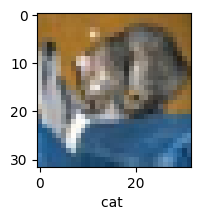

In [33]:
plot_sample(x_test, y_test, 0)

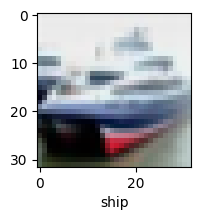

In [34]:
plot_sample(x_test, y_test, 1)

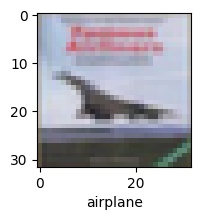

In [35]:
plot_sample(x_test, y_test, 3)

Normalization
Veri normalizasyonu, veri setindeki değerlerin bir ölçekte standart hale getirilmesi işlemidir. Bu işlem, veri setindeki değerlerin dağılımını belirli bir aralığa veya standart bir dağılıma göre yeniden düzenler. Normalizasyonun temel amacı, farklı özellikler arasındaki ölçek farklılıklarını gidermek ve modelin daha iyi performans göstermesini sağlamaktır.

In [36]:
x_train =x_train /255
x_test =x_test /255


CNN tasarımını yapıyoruz 

In [37]:
deep_learning_model = models.Sequential([
    # İlk bölüm Convolution layer.. Bu kısımda fotoğraflardan tanımlama yapabilmek için özellikleri çıkarıyoruz...
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),#32 32 boyutu resmin 3 ise rgb
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # İkinci bölüm klasik Articial Neural Network olan layerımız.. Yukarıdaki özelliklerimiz ve training bilgilerine
    # göre ANN modelimizi eğiteceğiz..
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\cengh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
deep_learning_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
deep_learning_model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3955 - loss: 1.6601
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6095 - loss: 1.1112
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6677 - loss: 0.9586
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6978 - loss: 0.8685
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7239 - loss: 0.7908


In [40]:
deep_learning_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6945 - loss: 0.9038


[0.9225077033042908, 0.6854000091552734]

In [41]:
y_pred = deep_learning_model.predict(x_test)
y_pred[:3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.7756390e-03, 1.9914491e-04, 6.3815131e-03, 6.3149726e-01,
        6.8815280e-04, 3.4933698e-01, 2.9147298e-03, 1.6889657e-03,
        3.1210650e-03, 3.9649365e-04],
       [2.4139680e-02, 5.1099056e-01, 1.7676705e-04, 8.1265913e-05,
        2.2788405e-05, 6.4643777e-06, 5.4105835e-06, 2.0830408e-05,
        4.5655677e-01, 7.9994742e-03],
       [5.9447374e-02, 3.0272105e-01, 2.1586150e-02, 1.7003242e-02,
        4.6000979e-03, 4.3001384e-03, 2.4177104e-03, 5.1729367e-03,
        5.5376184e-01, 2.8989498e-02]], dtype=float32)

In [42]:
y_predictions_siniflari = [np.argmax(element) for element in y_pred]
y_predictions_siniflari[:3]



[3, 1, 8]

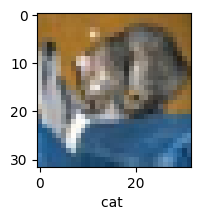

In [43]:
plot_sample(x_test, y_test,0)